In [16]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i0jt76QKedNzuxBlhPjT")
project = rf.workspace("reg-number-region-detection").project("register-number-detetction")
version = project.version(2)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Register-Number-Detetction-2 in yolov11:: 100%|██████████| 252/252 [00:00<00:00, 2271.61it/s]


In [18]:
%cd {HOME=/kaggle/working}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 plots=True

[Errno 2] No such file or directory: '{HOME=/kaggle/working}'
/kaggle/working
Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/Register-Number-Detetction-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

In [20]:
!ls /kaggle/working/runs/detect/train6

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1744600944.d05aef823e12.501.0  train_batch280.jpg
F1_curve.png					   train_batch281.jpg
labels_correlogram.jpg				   train_batch282.jpg
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   weights
results.csv


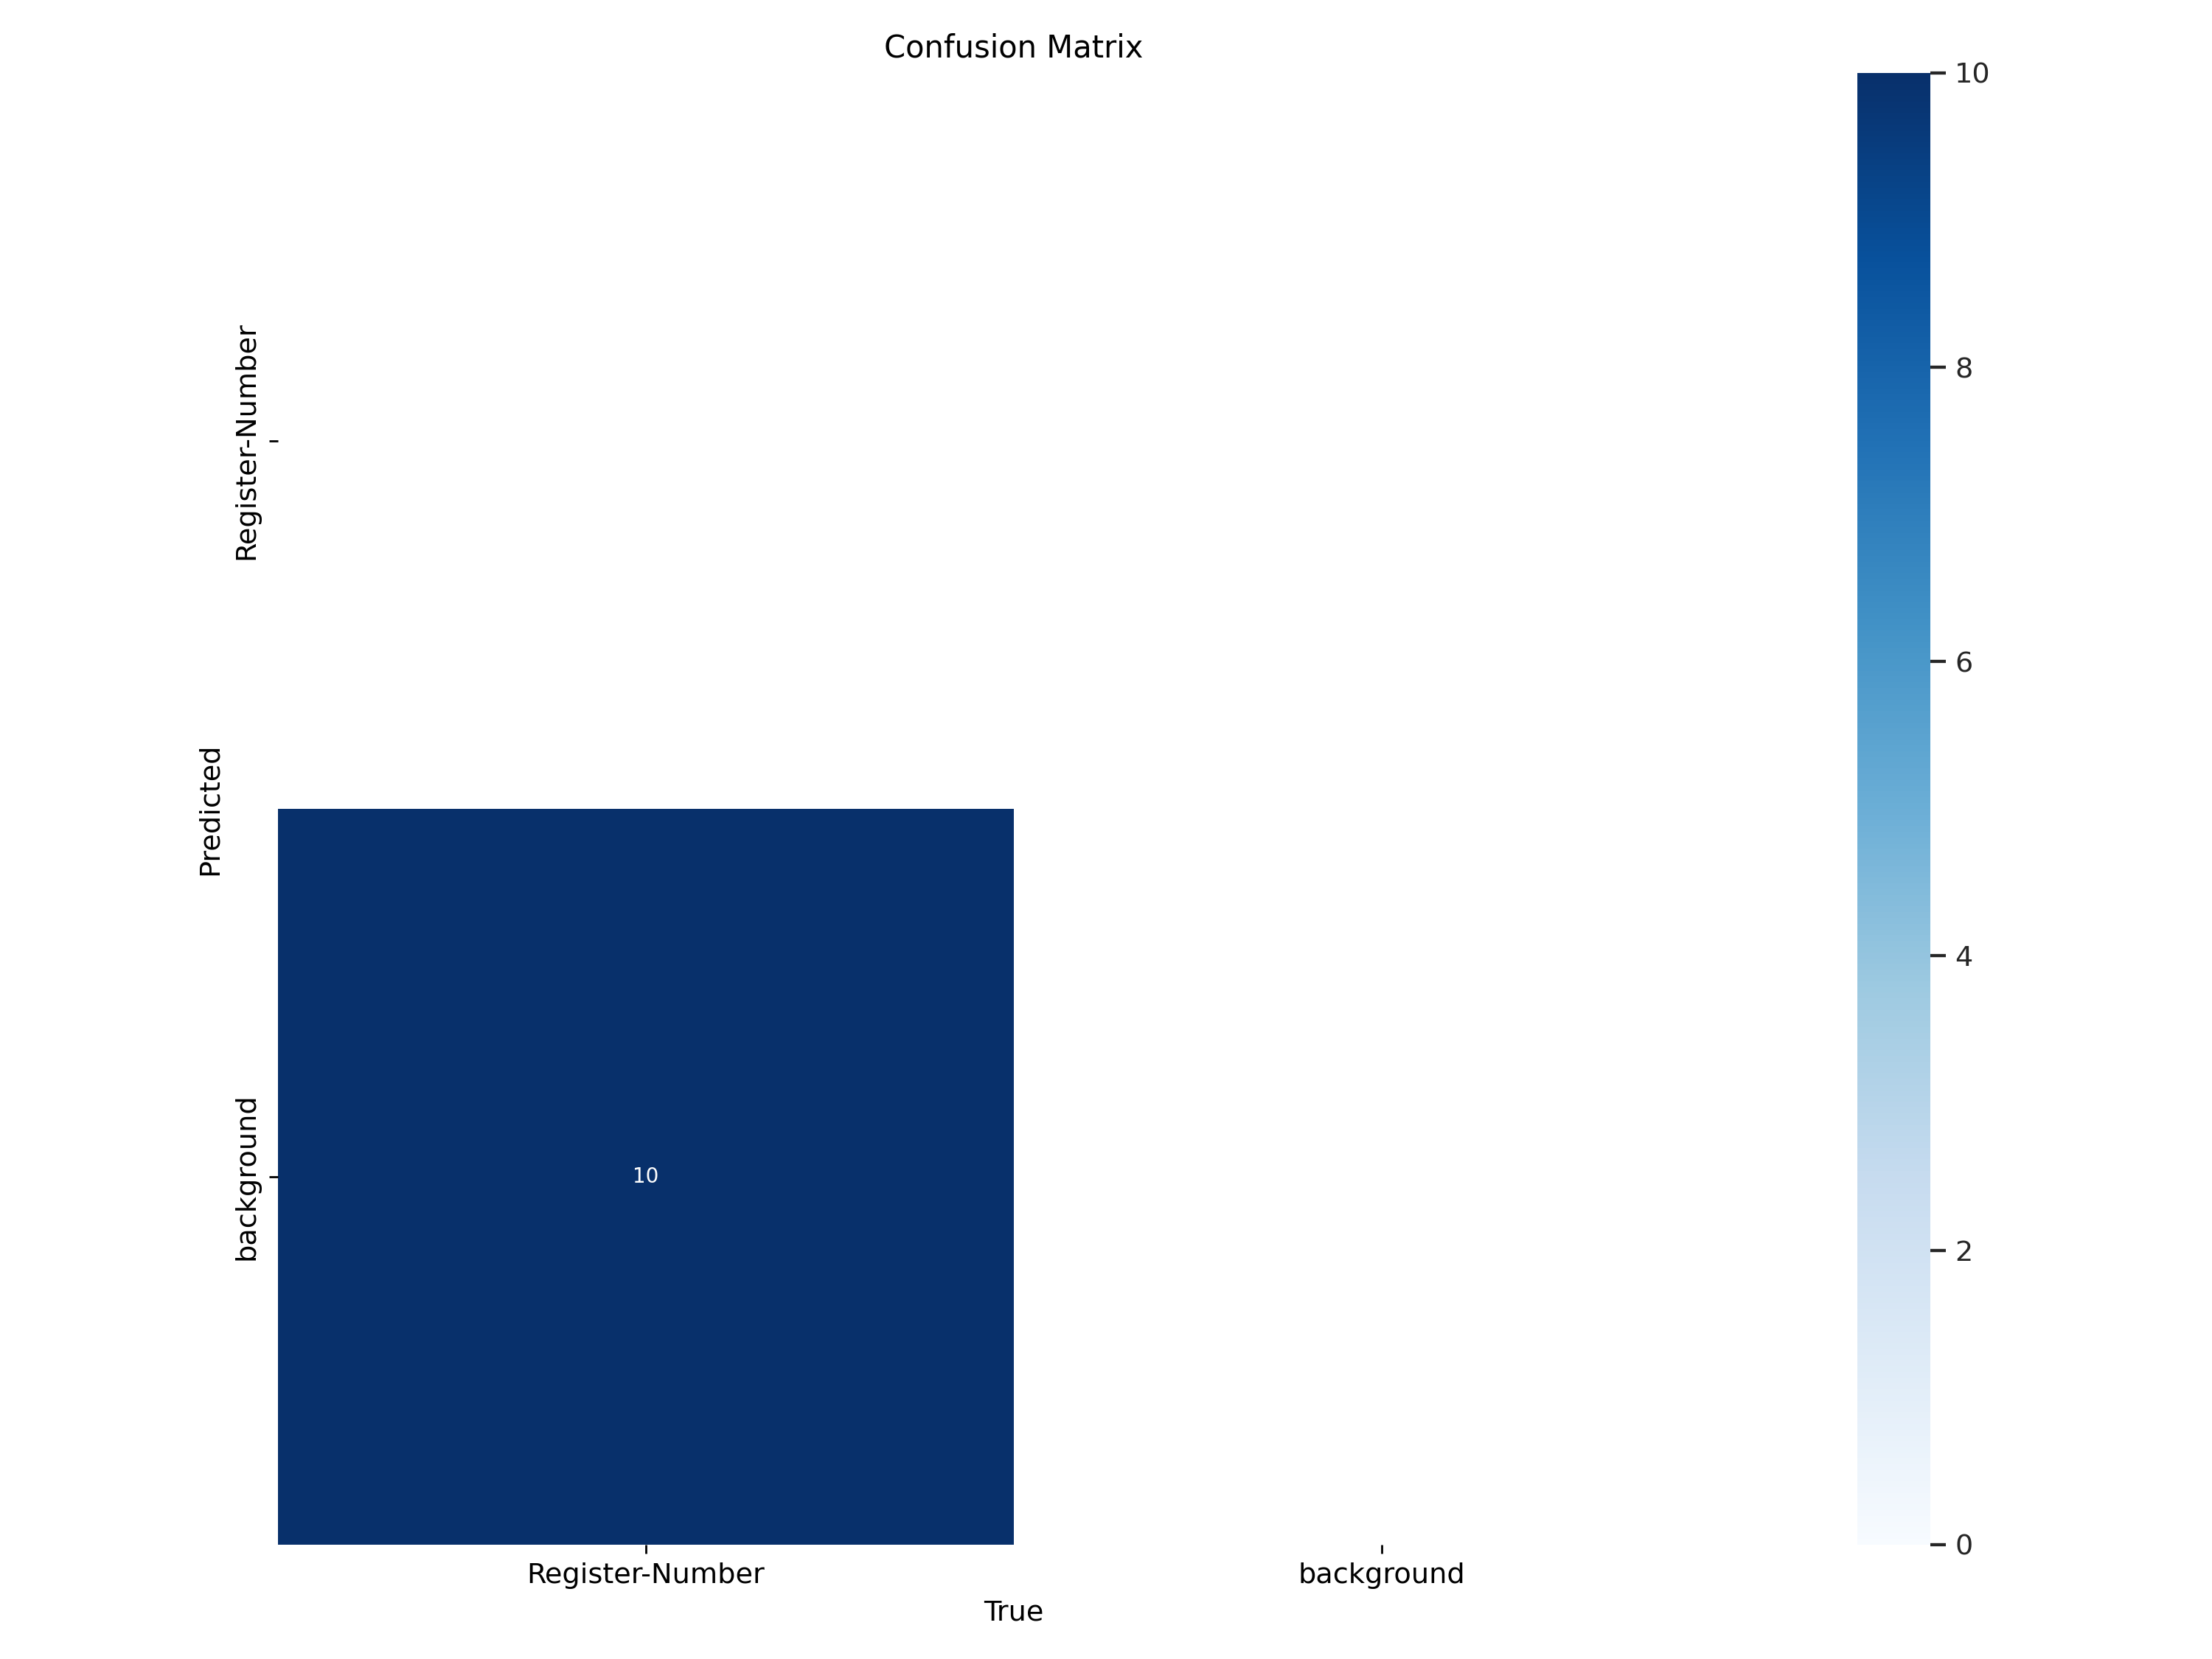

In [26]:
from IPython.display import Image as IPyImage
IPyImage(filename='/kaggle/working//runs/detect/train/confusion_matrix.png', width=600)

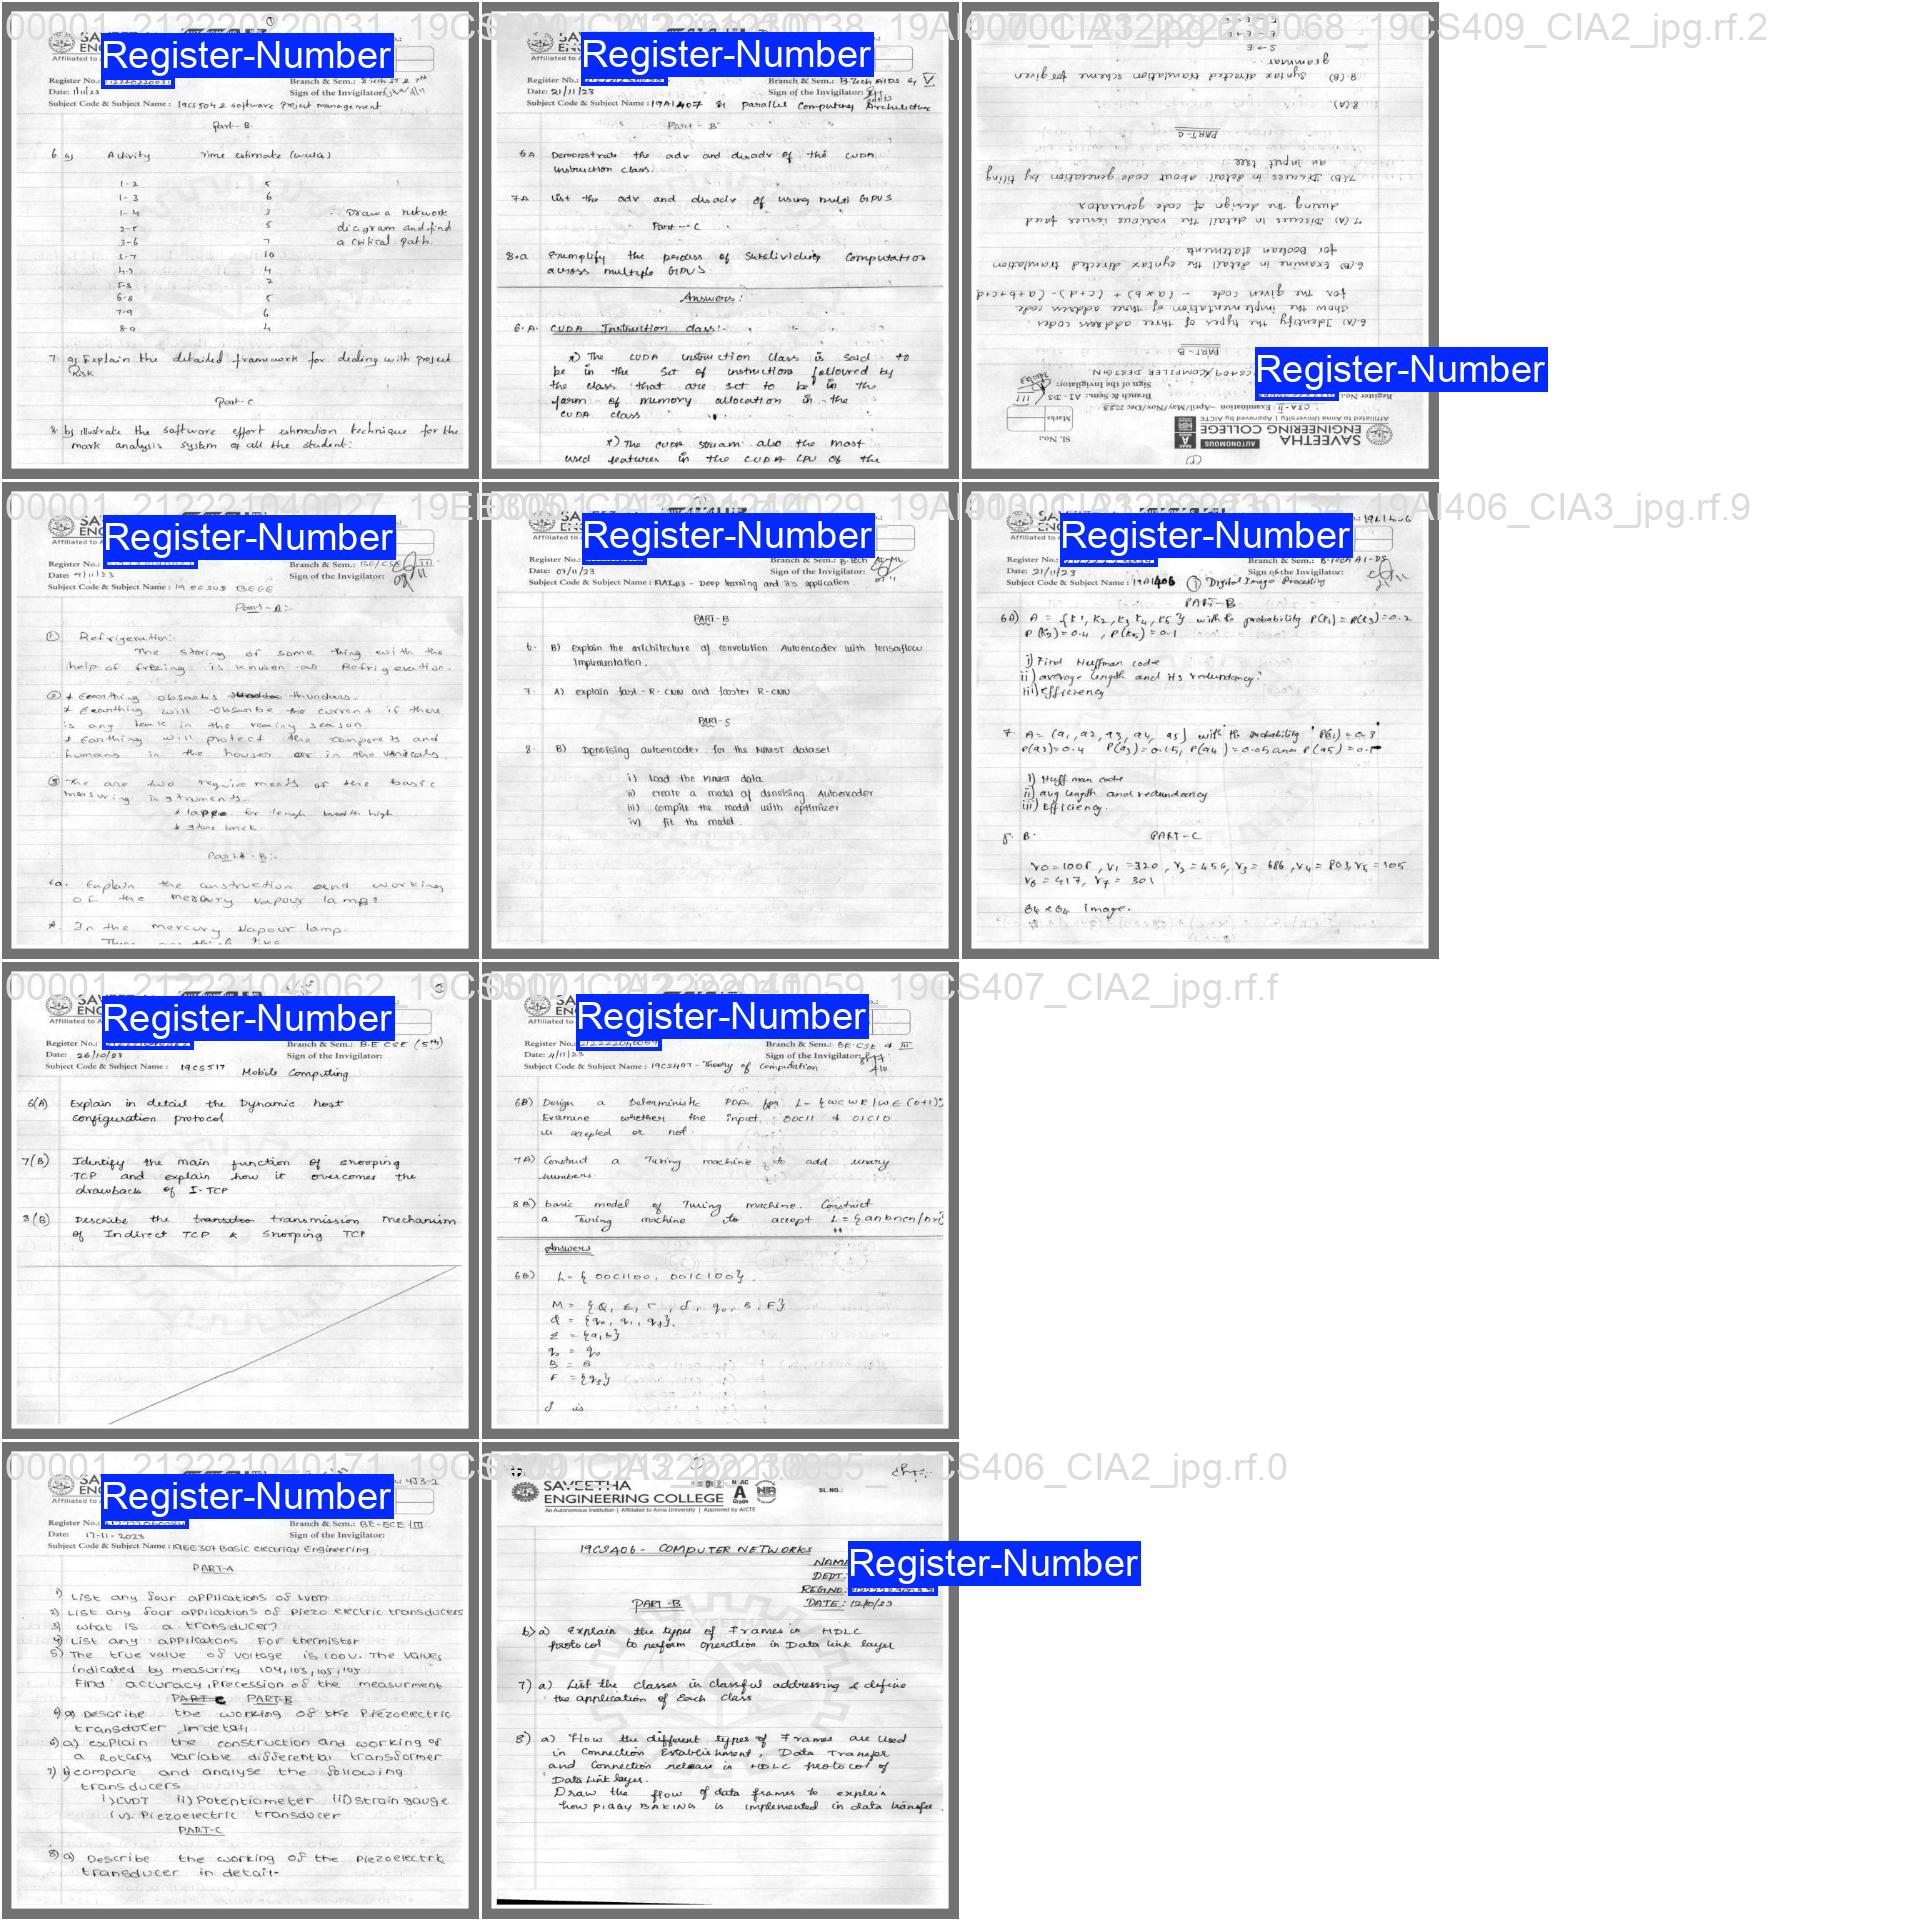

In [30]:
IPyImage(filename='/kaggle/working/runs/detect/val/val_batch0_labels.jpg', width=1000)

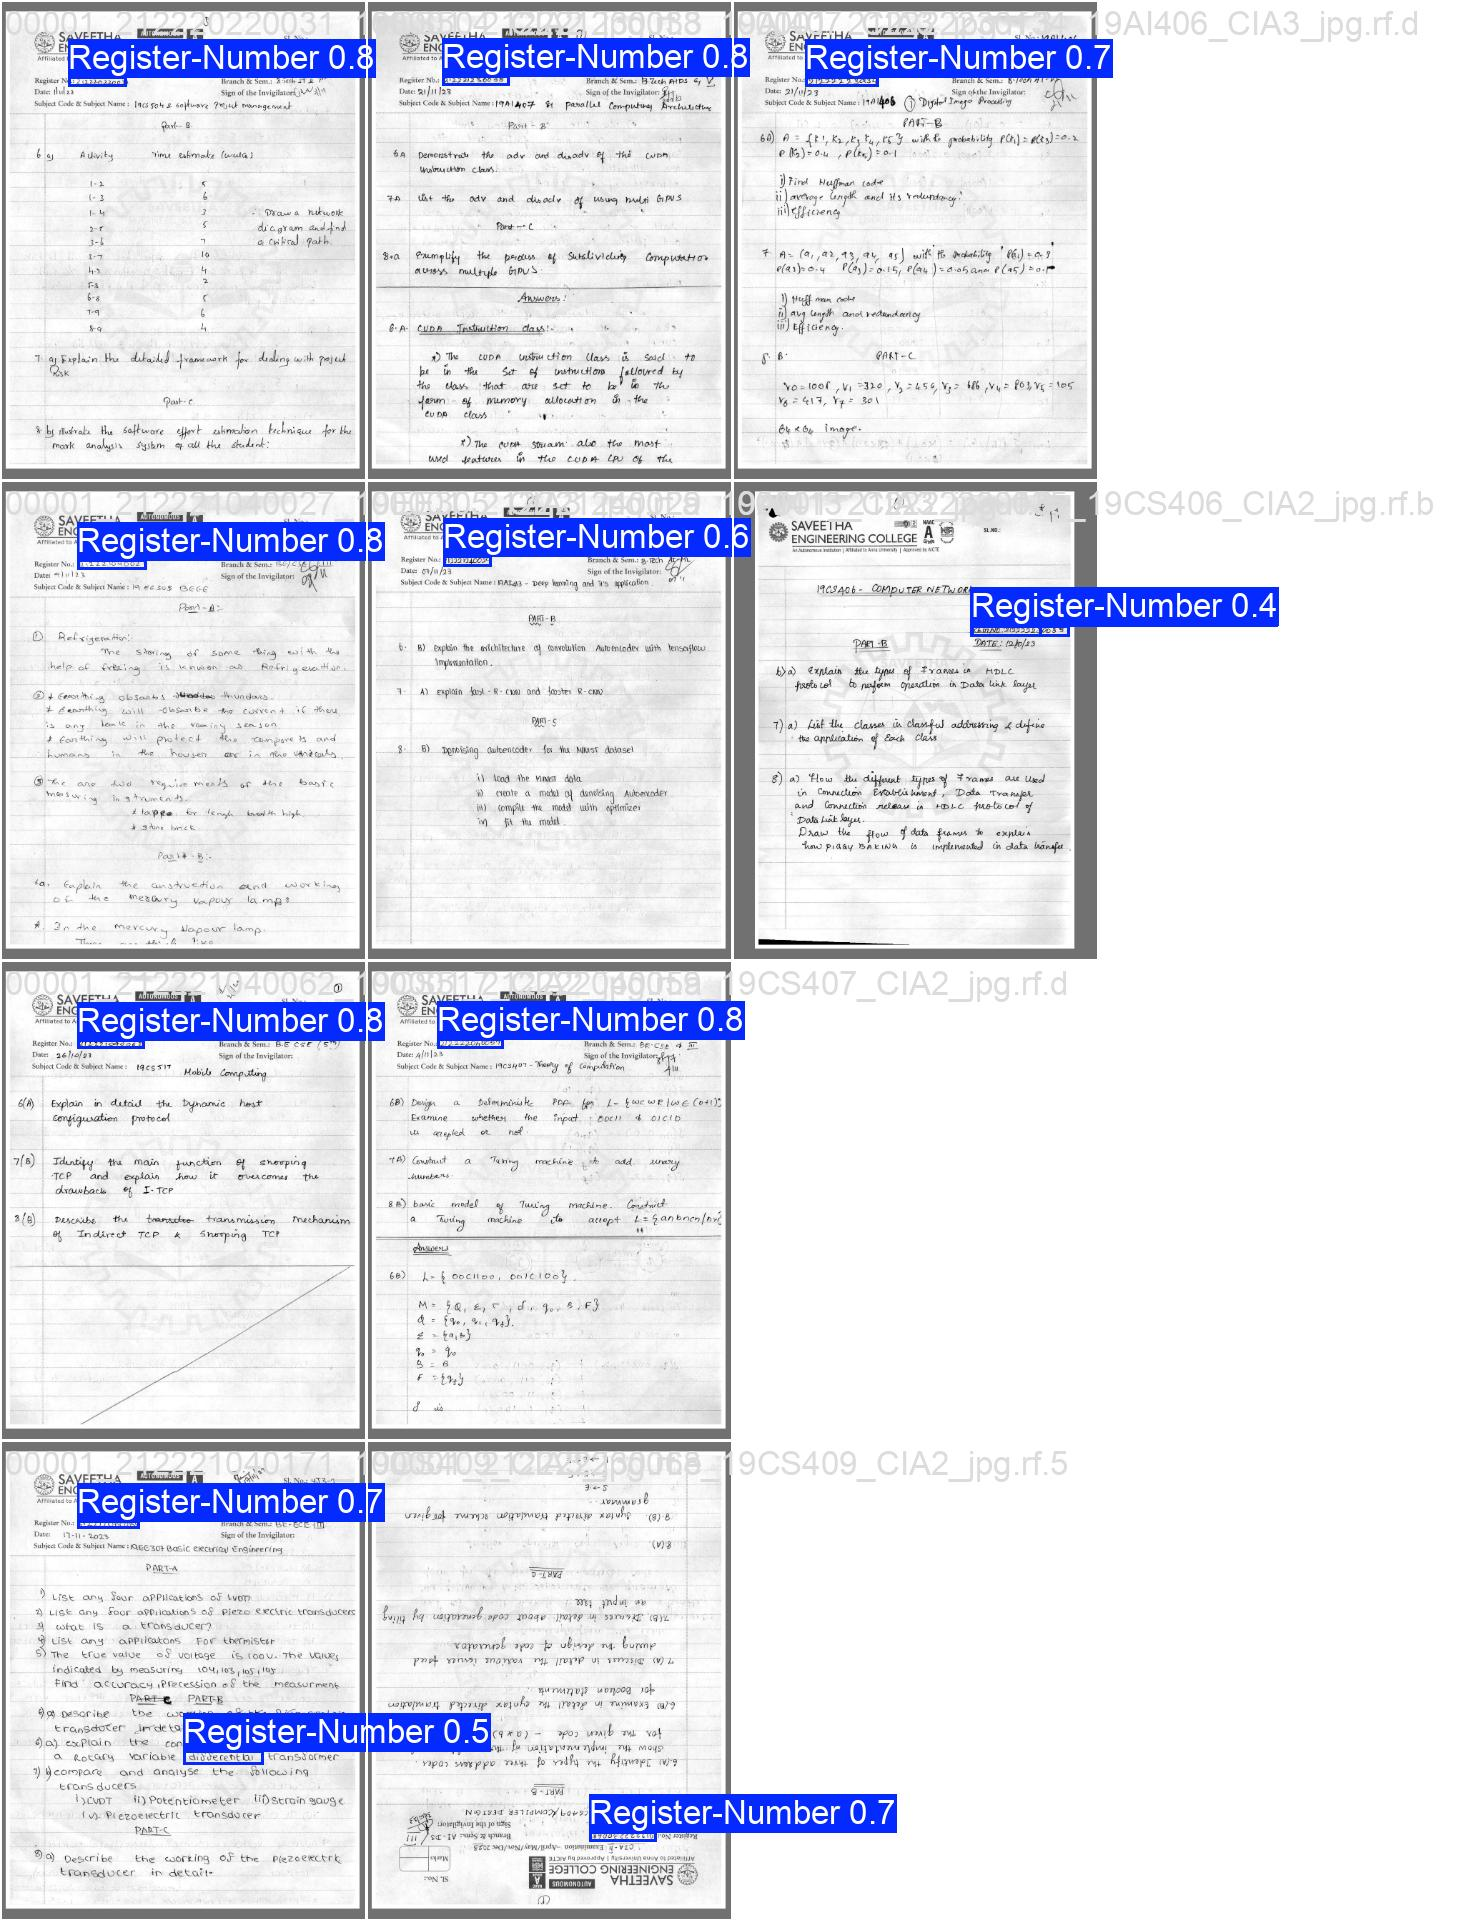

In [32]:
IPyImage(filename='/kaggle/working/runs/detect/train6/val_batch0_pred.jpg', width=1000)

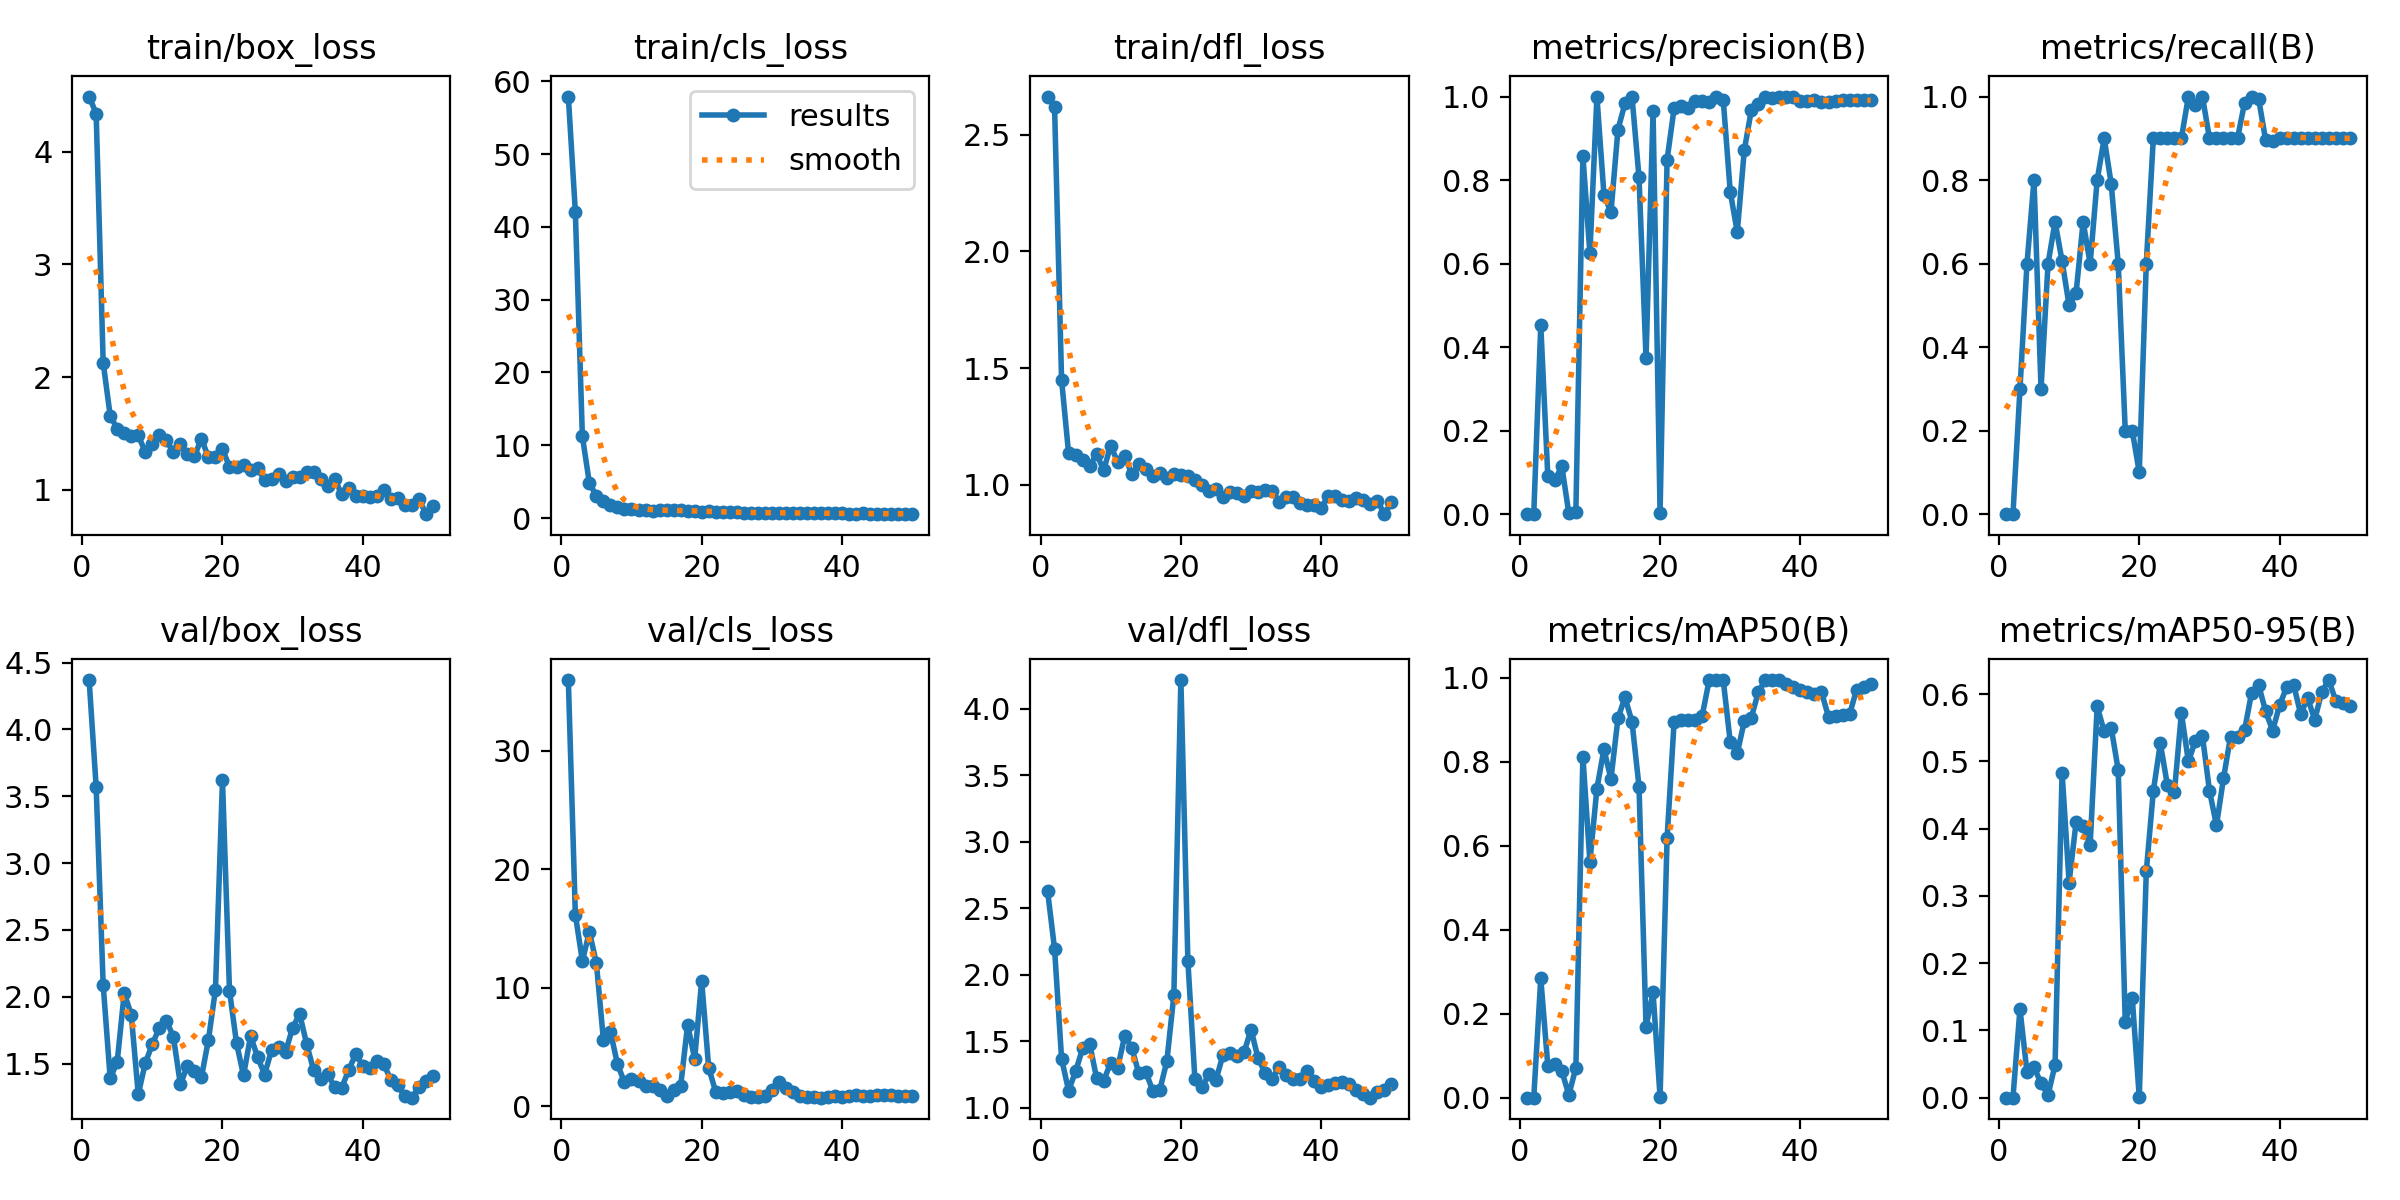

In [28]:
IPyImage(filename='/kaggle/working/runs/detect/train6/results.png', width=600)

In [34]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/Register-Number-Detetction-2/valid/labels.cache...
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         10          1      0.996      0.995      0.608
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.4ms preprocess, 10.7ms inference, 0.0ms loss, 16.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [35]:
!yolo task=detect mode=predict \
  model=/kaggle/working/runs/detect/train4/weights/best.pt \
  source=/kaggle/working/Register-Number-Detetction-2/test/images \
  data={dataset.location}/data.yaml \
  imgsz=640 \
  conf=0.1 \
  save=True


Ultralytics 8.3.107 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/5 /kaggle/working/Register-Number-Detetction-2/test/images/00001_212220040089_19CS523_CIA3_jpg.rf.50371ba1ba3a729e8ed6e79d8df42d3c.jpg: 640x448 (no detections), 43.0ms
image 2/5 /kaggle/working/Register-Number-Detetction-2/test/images/00001_212220220020_19CS504_CIA2_jpg.rf.9e2e082ecdc28fe3445368bac6df581a.jpg: 640x512 1 Register-Number, 43.9ms
image 3/5 /kaggle/working/Register-Number-Detetction-2/test/images/00001_212220230026_19MS155_CIA2_jpg.rf.844c9384515db7fe2d74144e6f263120.jpg: 640x512 (no detections), 8.6ms
image 4/5 /kaggle/working/Register-Number-Detetction-2/test/images/00001_212221230077_19AI405_CIA3_jpg.rf.9d2b16e820468367fb53aa809fb2b375.jpg: 640x512 (no detections), 8.6ms
image 5/5 /kaggle/working/Register-Number-Detetction-2/test/images/00001_212222230030_19MS154_CIA3_jpg.rf.a87ed697830c8505eb5ff5e